<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/USA/blob/main/presidential_debate_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic NLP applied to the debate

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!unzip '/content/drive/MyDrive/미국/presidential_debate2020/presidential-debate-2020.zip' -d '/content/drive/MyDrive/미국/presidential_debate2020/presidential-debate-2020/'

Archive:  /content/drive/MyDrive/미국/presidential_debate2020/presidential-debate-2020.zip
replace /content/drive/MyDrive/미국/presidential_debate2020/presidential-debate-2020/us_election_2020_1st_presidential_debate.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/drive/MyDrive/미국/presidential_debate2020/presidential-debate-2020/us_election_2020_1st_presidential_debate.mp3? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/drive/MyDrive/미국/presidential_debate2020/presidential-debate-2020/us_election_2020_1st_presidential_debate.mp3  
  inflating: /content/drive/MyDrive/미국/presidential_debate2020/presidential-debate-2020/us_election_2020_1st_presidential_debate.txt  
  inflating: /content/drive/MyDrive/미국/presidential_debate2020/presidential-debate-2020/us_election_2020_2nd_presidential_debate.csv  
  inflating: /content/drive/MyDrive/미국/presidential_debate2020/presidential-debate-2020/us_election_2020_2nd_presidential_debate.mp3  
  inflating:

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import nltk
from nltk.corpus import stopwords
from nltk import bigrams
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from collections import Counter

In [6]:
df = pd.read_csv('/content/drive/MyDrive/미국/presidential_debate2020/presidential-debate-2020/us_election_2020_1st_presidential_debate.csv')
df.head()

,speaker,minute,text
0,Chris Wallace,01:20,Good evening from the Health Education Campus ...
1,Chris Wallace,02:10,This debate is being conducted under health an...
2,Vice President Joe Biden,02:49,"How you doing, man?"
3,President Donald J. Trump,02:51,How are you doing?
4,Vice President Joe Biden,02:51,I’m well.


In [7]:
df.shape

(789, 3)

In [8]:
# split by speaker
df_CW = df[df.speaker=='Chris Wallace']
df_JB = df[df.speaker=='Vice President Joe Biden']
df_DT = df[df.speaker=='President Donald J. Trump']


In [9]:
df_CW

,speaker,minute,text
0,Chris Wallace,01:20,Good evening from the Health Education Campus ...
1,Chris Wallace,02:10,This debate is being conducted under health an...
5,Chris Wallace,03:11,"Gentlemen, a lot of people been waiting for th..."
8,Chris Wallace,05:22,"President Trump, thank you. Same question to y..."
19,Chris Wallace,08:29,"Gentlemen, we’re now into open discussion."
...,...,...,...
778,Chris Wallace,01:09:18,"Vice President Biden, final question for you. ..."
781,Chris Wallace,01:10:10,I asked you. You had an opportunity to respond...
784,Chris Wallace,01:10:43,"Gentlemen, just say that’s the end of it [cros..."
786,Chris Wallace,01:10:48,We’re going to leave it there-


In [10]:
df_DT

,speaker,minute,text
3,President Donald J. Trump,02:51,How are you doing?
6,President Donald J. Trump,04:01,"Thank you very much, Chris. I will tell you ve..."
7,President Donald J. Trump,04:53,And we won the election and therefore we have ...
10,President Donald J. Trump,05:34,"Thank you, Joe."
14,President Donald J. Trump,07:34,There aren’t a hundred million people with pre...
...,...,...,...
777,President Donald J. Trump,01:09:17,You think that’s good?
780,President Donald J. Trump,01:10:07,It’s already been established. Take a look at ...
783,President Donald J. Trump,01:10:41,I want to see an honest ballot cut-
785,President Donald J. Trump,01:10:47,I want to see an honest ballot count.


In [11]:
df_JB

,speaker,minute,text
2,Vice President Joe Biden,02:49,"How you doing, man?"
4,Vice President Joe Biden,02:51,I’m well.
9,Vice President Joe Biden,05:29,"Well, first of all, thank you for doing this a..."
11,Vice President Joe Biden,05:36,The American people have a right to have a say...
12,Vice President Joe Biden,06:12,"Now, what’s at stake here is the President’s m..."
...,...,...,...
751,Vice President Joe Biden,01:05:37,Five states have had mail-in ballots for the l...
756,Vice President Joe Biden,01:06:36,I am concerned that any court would settle thi...
761,Vice President Joe Biden,01:07:19,Mail service delivers [crosstalk 01:07:21] 185...
779,Vice President Joe Biden,01:09:30,Yes. And here’s the deal. We count the ballots...


In [12]:
print('Number of segments - Chris Wallace             : ', df_CW.shape[0])
print('Number of segments - President Donald J. Trump : ', df_DT.shape[0])
print('Number of segments - Vice President Joe Biden  : ', df_JB.shape[0])

Number of segments - Chris Wallace             :  225
Number of segments - President Donald J. Trump :  314
Number of segments - Vice President Joe Biden  :  249


In [13]:
# convert to strings
text_CW = " ".join(txt for txt in df_CW.text)
text_DT = " ".join(txt for txt in df_DT.text)
text_JB = " ".join(txt for txt in df_JB.text)

# compare total text lengths
print('Length of text - Chris Wallace             : ', len(text_CW))
print('Length of text - President Donald J. Trump : ', len(text_DT))
print('Length of text - Vice President Joe Biden  : ', len(text_JB))

Length of text - Chris Wallace             :  26053
Length of text - President Donald J. Trump :  38791
Length of text - Vice President Joe Biden  :  35370


In [14]:
stopwords = set(STOPWORDS)

# Wordcloud Chris Wallace

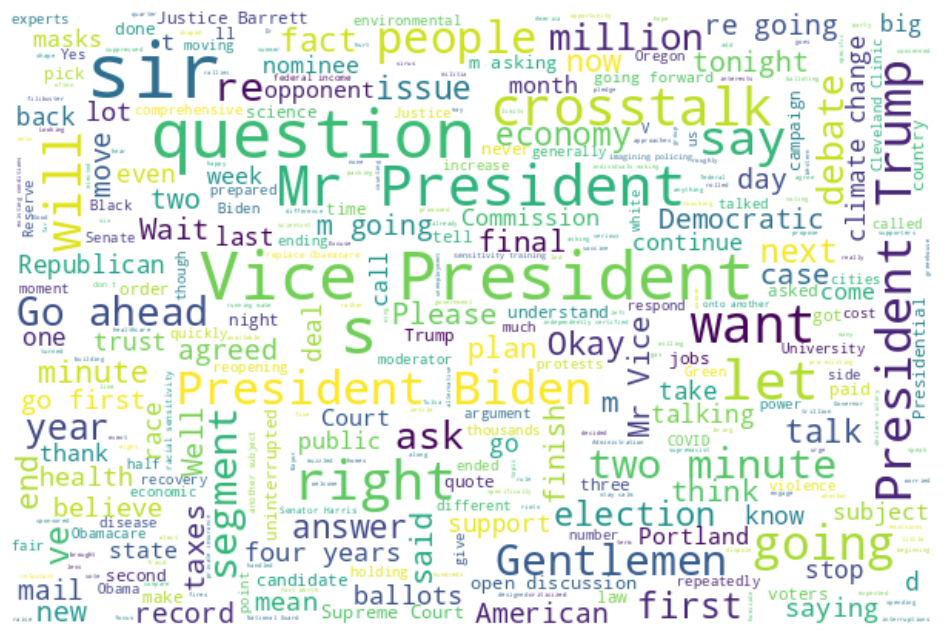

In [15]:
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=500,
                      width = 600, height = 400,
                      background_color="white").generate(text_CW)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Wordcloud President Donald J. Trump

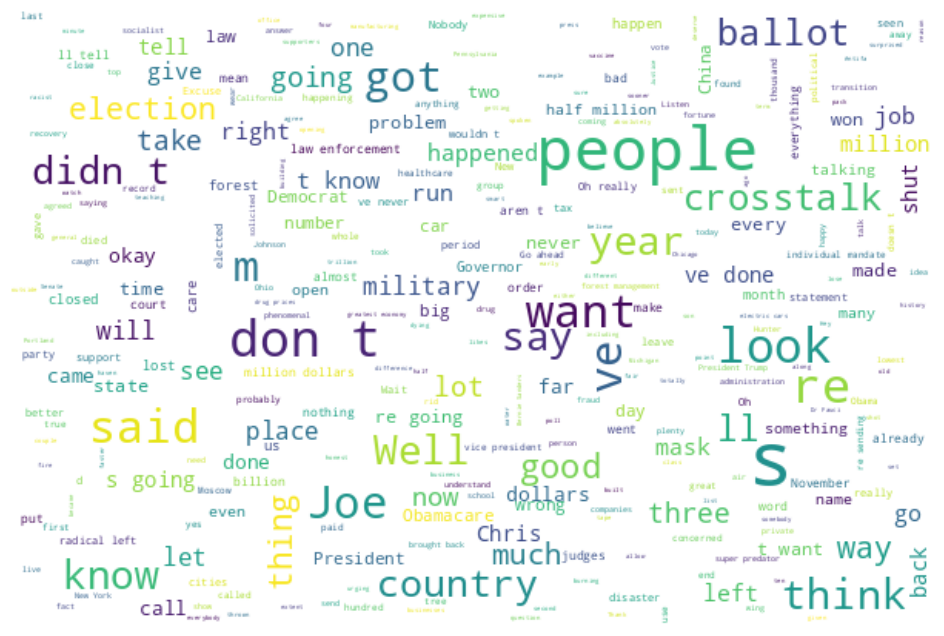

In [16]:
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=500,
                      width = 600, height = 400,
                      background_color="white").generate(text_DT)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Wordcloud Vice President Joe Biden

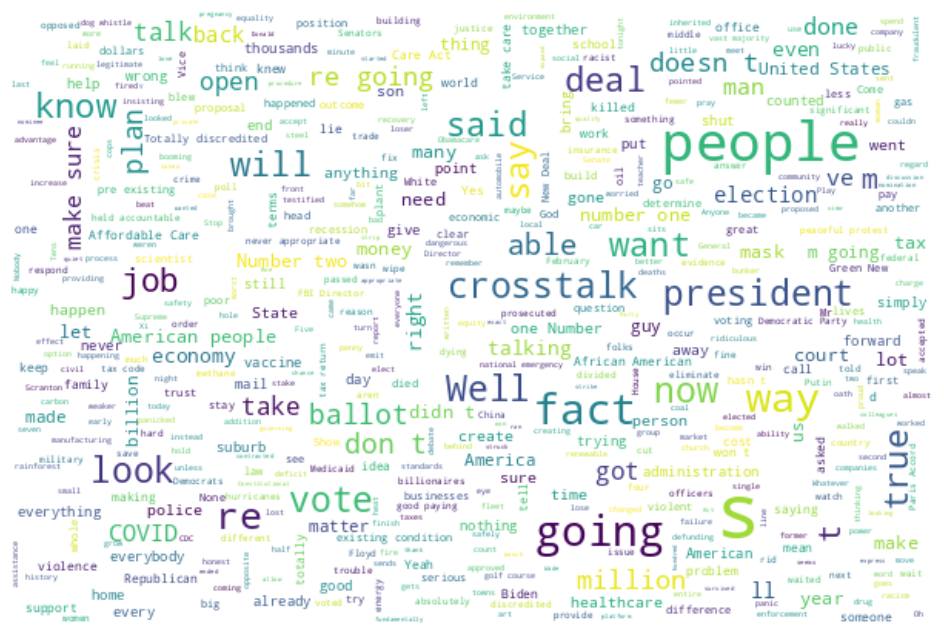

In [17]:
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=500,
                      width = 600, height = 400,
                      background_color="white").generate(text_JB)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Word frequencies

In [19]:
import nltk
nltk.download('stopwords')

# standard stopwords
my_stopwords = set(nltk.corpus.stopwords.words('english'))
# additional stopwords
my_stopwords = my_stopwords.union({"'s","'ll","'re","n't","'ve","'m"})

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Chris Wallace

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


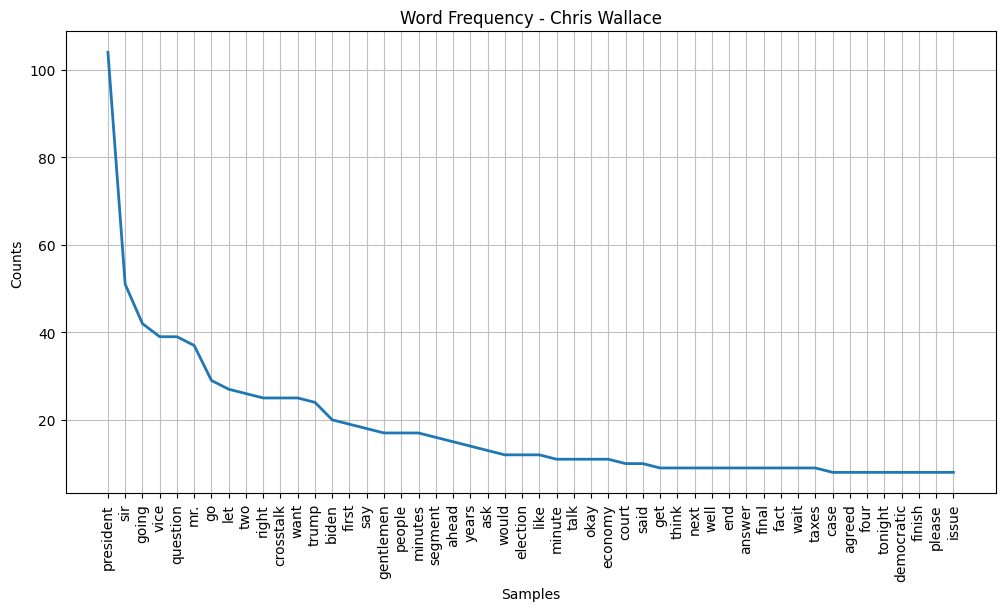

<Axes: title={'center': 'Word Frequency - Chris Wallace'}, xlabel='Samples', ylabel='Counts'>

In [21]:
# lower case
text = text_CW.lower()
# Download the 'punkt' resource
nltk.download('punkt')

# lower case
text = text_CW.lower()

# tokenize text
words = nltk.word_tokenize(text)

# remove single characters
words = [word for word in words if len(word) > 1]

# remove stopwords
words = [word for word in words if word not in my_stopwords]

# count word frequencies
word_freqs = nltk.FreqDist(words)

# plot word frequencies
plt.rcParams['figure.figsize'] = [12, 6]
plt.title('Word Frequency - Chris Wallace')
word_freqs.plot(50)

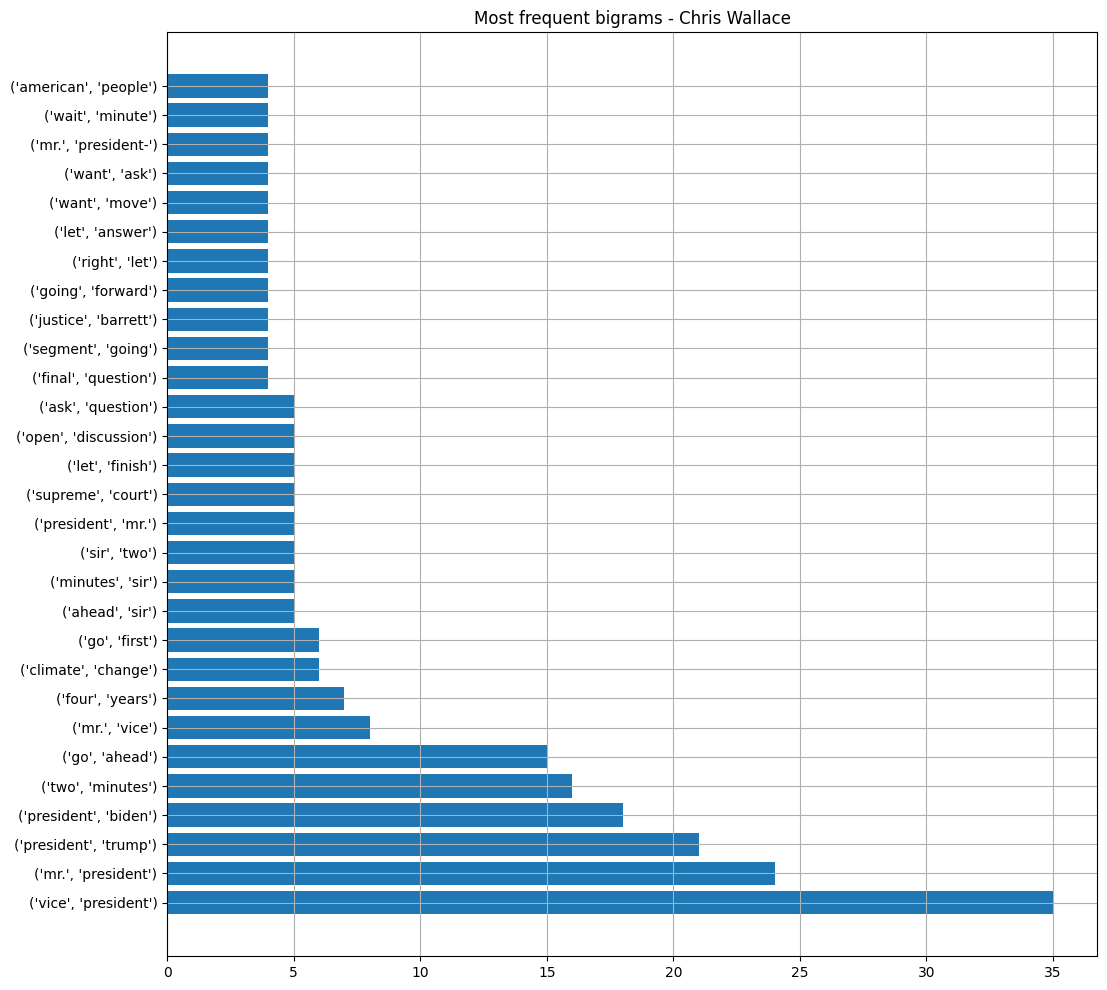

In [22]:
my_bigrams = bigrams(words)
counts = Counter(my_bigrams)
counts = dict(counts)
# convert dictionary to data frame
dcounts = pd.DataFrame.from_dict(counts, orient='index', columns=['frequency'])
# select only bigrams occuring at least four times
dcounts = dcounts[dcounts.frequency>=4]
# and sort descending
dcounts = dcounts.sort_values(by='frequency', ascending=False)
plt.rcParams['figure.figsize'] = [12, 12]
plt.barh(list(map(str, dcounts.index)), dcounts.frequency)
plt.title('Most frequent bigrams - Chris Wallace')
plt.grid()
plt.show()

### President Donald J. Trump

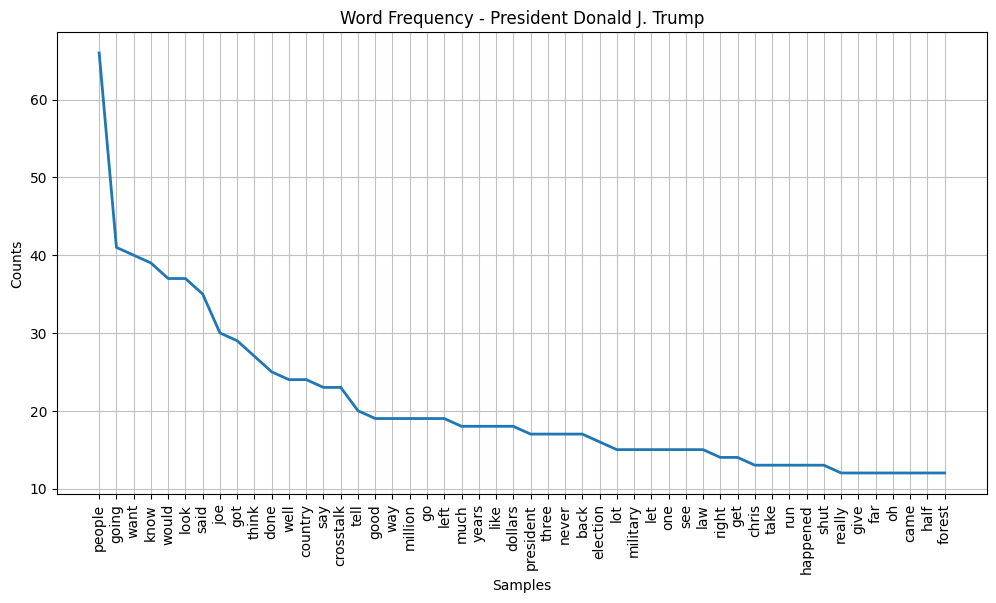

<Axes: title={'center': 'Word Frequency - President Donald J. Trump'}, xlabel='Samples', ylabel='Counts'>

In [23]:
# lower case
text = text_DT.lower()
# tokenize text
words = nltk.word_tokenize(text)
# remove single characters
words = [word for word in words if len(word) > 1]
# remove stopwords
words = [word for word in words if word not in my_stopwords]
# count word frequencies
word_freqs = nltk.FreqDist(words)
# plot word frequencies
plt.rcParams['figure.figsize'] = [12, 6]
plt.title('Word Frequency - President Donald J. Trump')
word_freqs.plot(50)

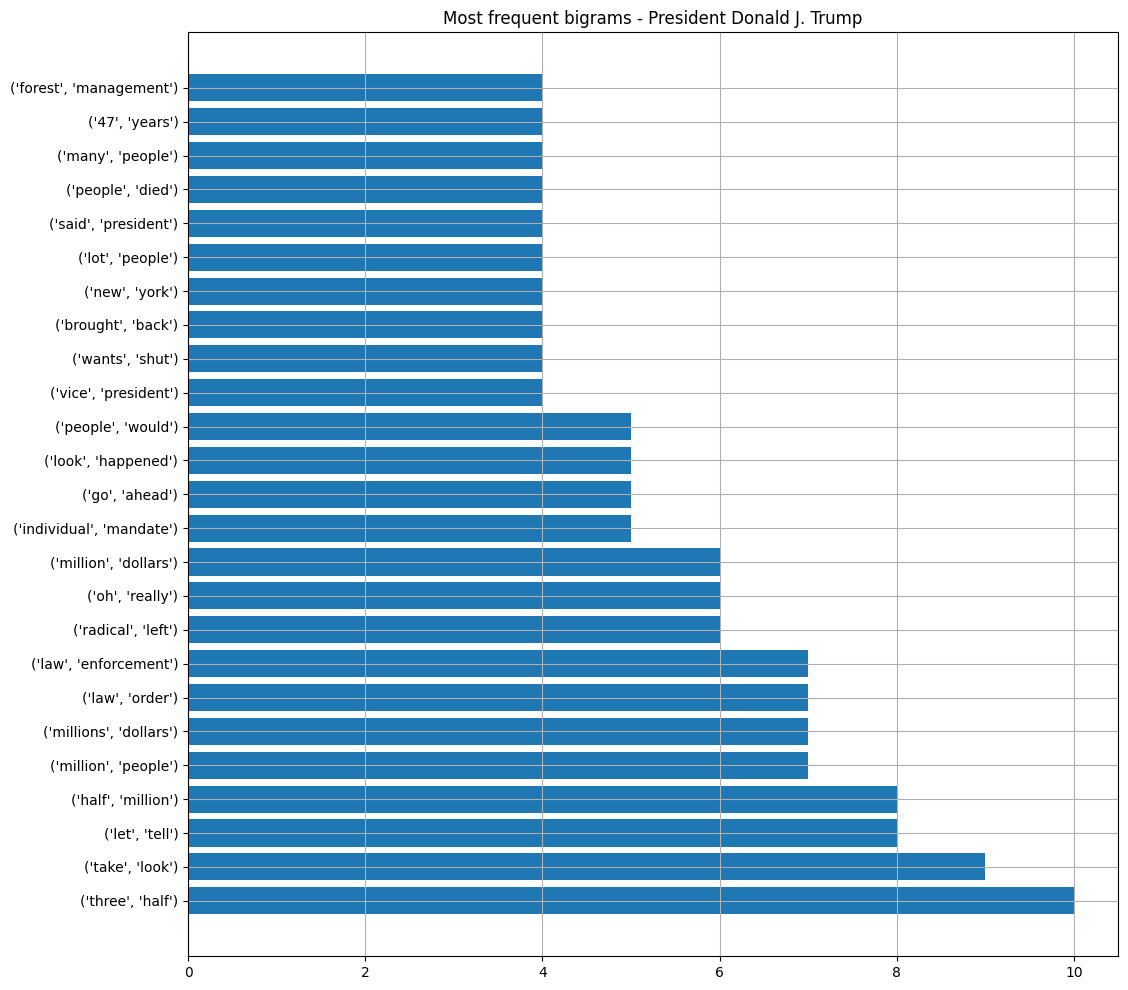

In [24]:
my_bigrams = bigrams(words)
counts = Counter(my_bigrams)
counts = dict(counts)
# convert dictionary to data frame
dcounts = pd.DataFrame.from_dict(counts, orient='index', columns=['frequency'])
# select only bigrams occuring at least four times
dcounts = dcounts[dcounts.frequency>=4]
# and sort descending
dcounts = dcounts.sort_values(by='frequency', ascending=False)
plt.rcParams['figure.figsize'] = [12, 12]
plt.barh(list(map(str, dcounts.index)), dcounts.frequency)
plt.title('Most frequent bigrams - President Donald J. Trump')
plt.grid()
plt.show()

### Vice President Joe Biden

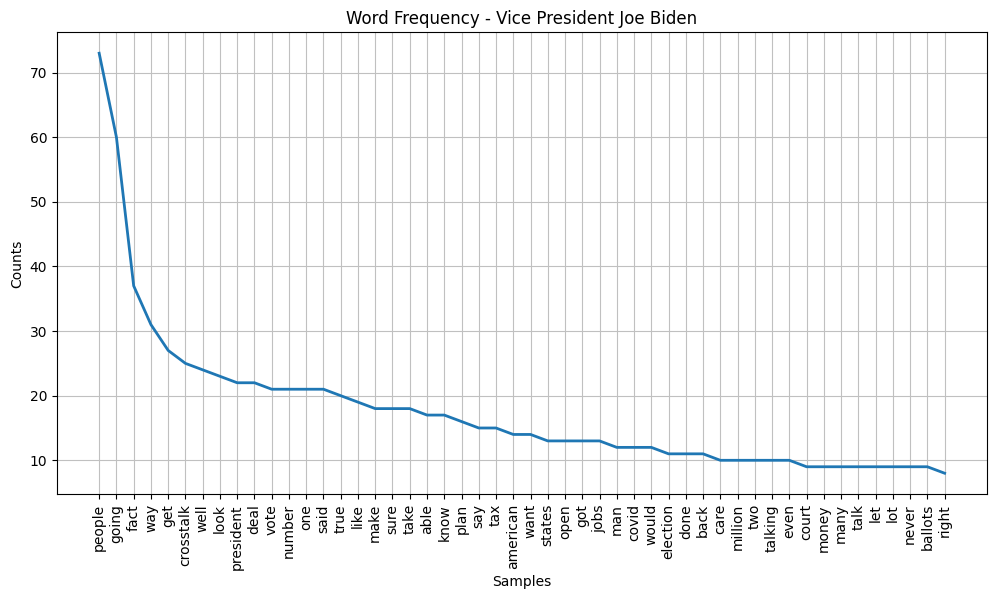

<Axes: title={'center': 'Word Frequency - Vice President Joe Biden'}, xlabel='Samples', ylabel='Counts'>

In [25]:
# lower case
text = text_JB.lower()
# tokenize text
words = nltk.word_tokenize(text)
# remove single characters
words = [word for word in words if len(word) > 1]
# remove stopwords
words = [word for word in words if word not in my_stopwords]
# count word frequencies
word_freqs = nltk.FreqDist(words)
# plot word frequencies
plt.rcParams['figure.figsize'] = [12, 6]
plt.title('Word Frequency - Vice President Joe Biden')
word_freqs.plot(50)

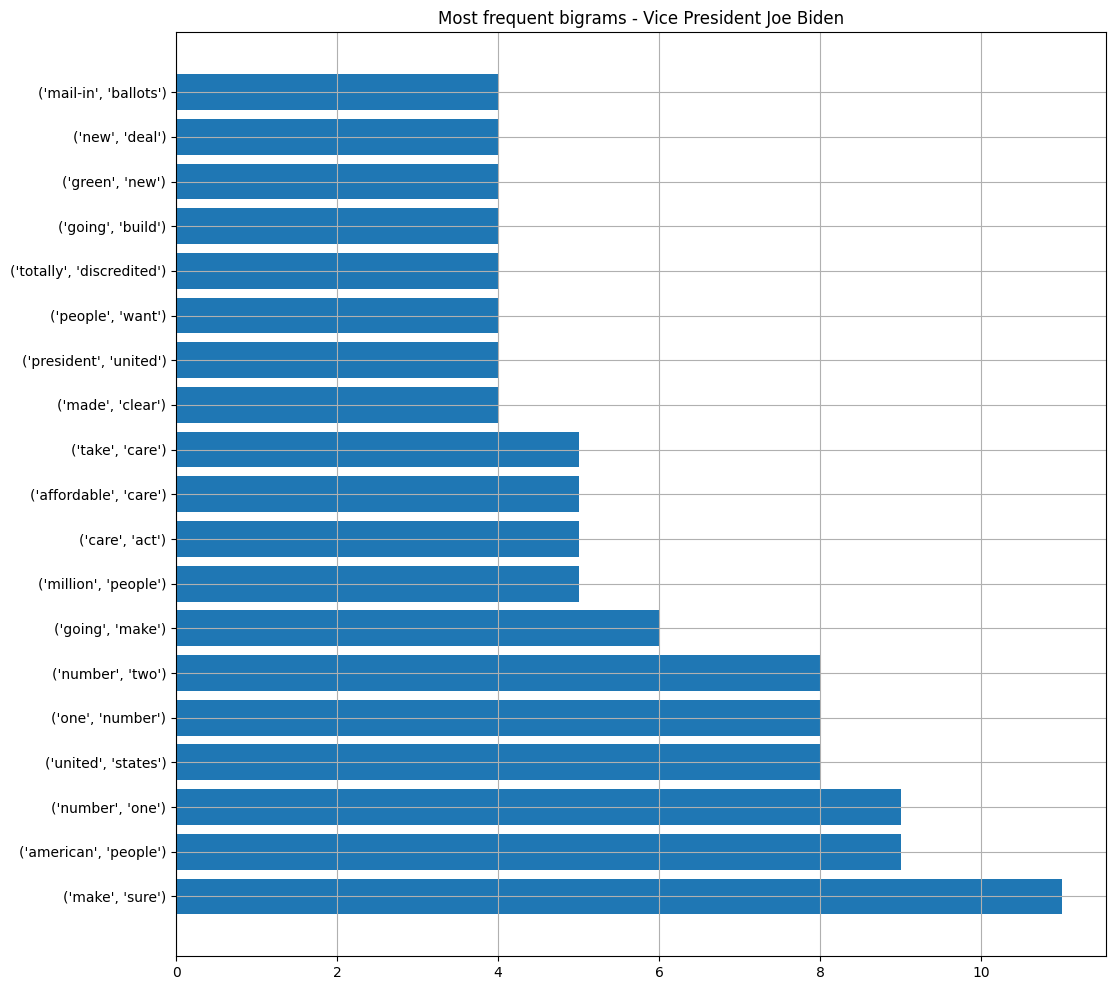

In [26]:
my_bigrams = bigrams(words)
counts = Counter(my_bigrams)
counts = dict(counts)
# convert dictionary to data frame
dcounts = pd.DataFrame.from_dict(counts, orient='index', columns=['frequency'])
# select only bigrams occuring at least four times
dcounts = dcounts[dcounts.frequency>=4]
# and sort descending
dcounts = dcounts.sort_values(by='frequency', ascending=False)
plt.rcParams['figure.figsize'] = [12, 12]
plt.barh(list(map(str, dcounts.index)), dcounts.frequency)
plt.title('Most frequent bigrams - Vice President Joe Biden')
plt.grid()
plt.show()

# Sentiment

In [28]:
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [29]:
sent = sia.polarity_scores(text_CW)
sent_val = sent['compound']
sent.pop('compound')
print('CW: sentiment score = ', sent_val)
print('CW: split = ', sent)

CW: sentiment score =  0.9995
CW: split =  {'neg': 0.062, 'neu': 0.835, 'pos': 0.103}


In [30]:
sent = sia.polarity_scores(text_DT)
sent_val = sent['compound']
sent.pop('compound')
print('DT: sentiment score = ', sent_val)
print('DT: split = ', sent)

DT: sentiment score =  0.9992
DT: split =  {'neg': 0.095, 'neu': 0.787, 'pos': 0.118}


In [31]:
sent = sia.polarity_scores(text_JB)
sent_val = sent['compound']
sent.pop('compound')
print('JB: sentiment score = ', sent_val)
print('JB: split = ', sent)

JB: sentiment score =  -0.9726
JB: split =  {'neg': 0.107, 'neu': 0.78, 'pos': 0.114}
